<h1>Handling Missing Numerical Data</h1>
* When Data is Missing at Random (MAR) → Use Mean/Median Imputation
* When Data is Not Missing at Random (NMAR) → Use Arbitrary Value Imputation

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [54]:
df = pd.read_csv('/content/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [55]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


# Mean/Median Imputation Using Pandas

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [57]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [58]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [59]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


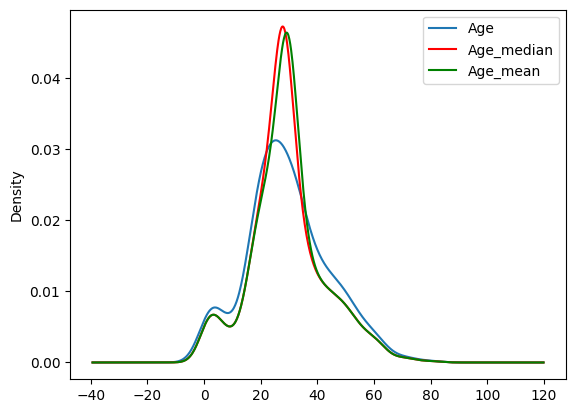

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [61]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [62]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


<Axes: >

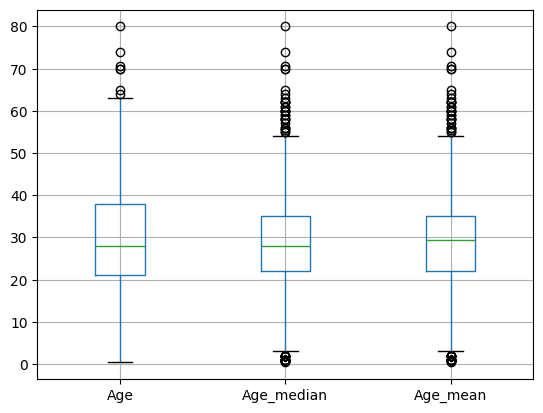

In [63]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

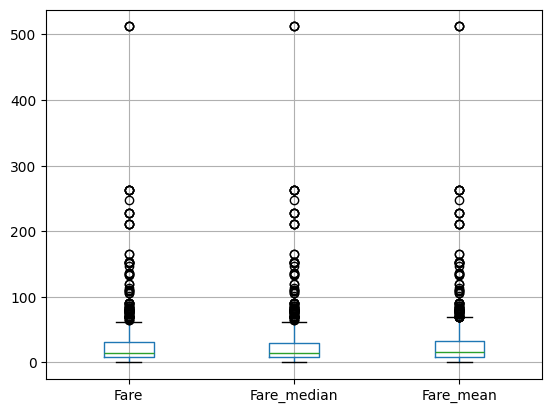

In [64]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# Mean/Median Imputation Using Sklearn

* Not Often used in Production.
* Cant be used for missing data >5%.
* Changes the distribution shape.
* Changes in Corelation.
* Use only when the data is misssing at random

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

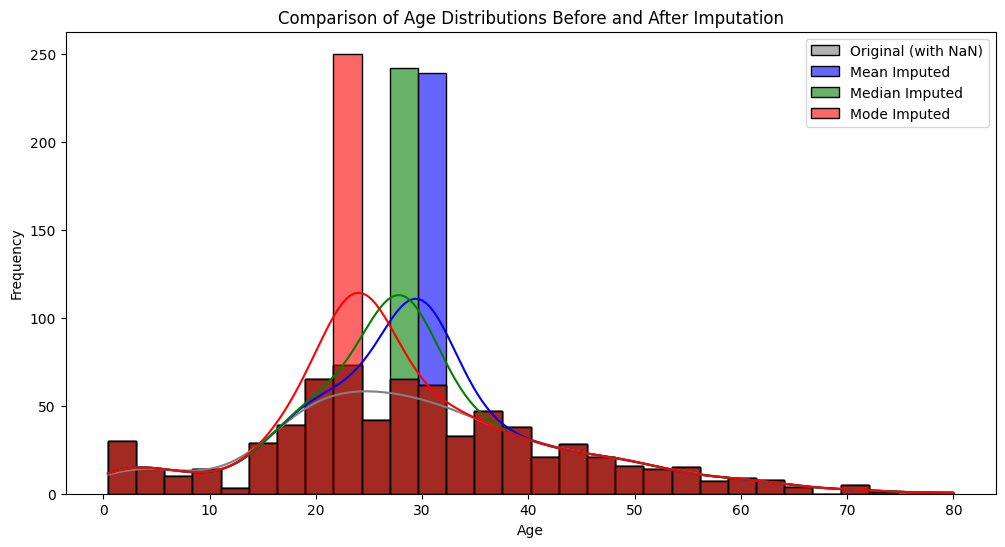

In [66]:
plt.figure(figsize=(12, 6))

# Original distribution
sns.histplot(df["Age"], bins=30, kde=True, color="gray", label="Original (with NaN)", alpha=0.6)
# Mean Imputation
sns.histplot(df["Age"].fillna(df["Age"].mean()), bins=30, kde=True, color="blue", label="Mean Imputed", alpha=0.6)
# Median Imputation
sns.histplot(df["Age"].fillna(df["Age"].median()), bins=30, kde=True, color="green", label="Median Imputed", alpha=0.6)
# Mode Imputation
sns.histplot(df["Age"].fillna(df["Age"].mode()[0]), bins=30, kde=True, color="red", label="Mode Imputed", alpha=0.6)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Comparison of Age Distributions Before and After Imputation")
plt.show()


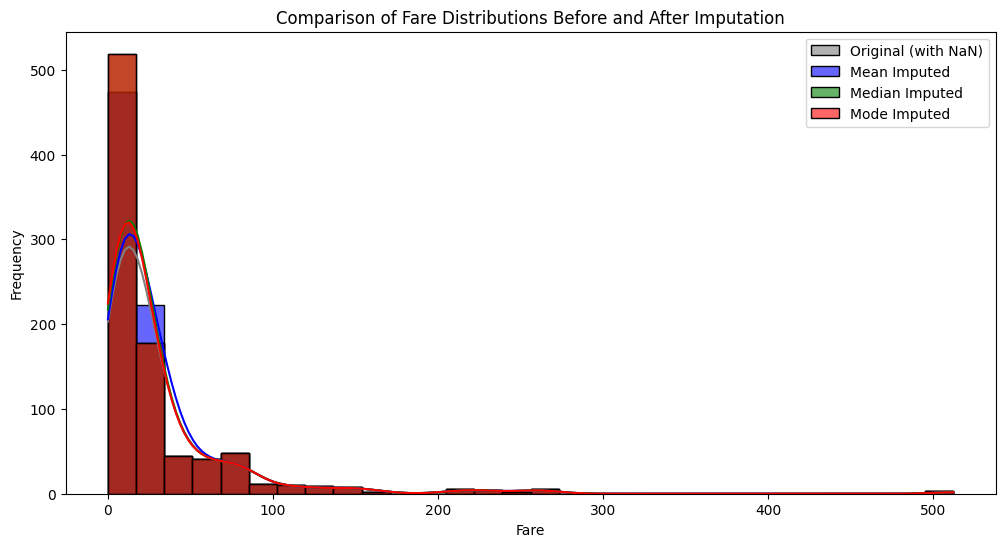

In [67]:
plt.figure(figsize=(12, 6))
# Original distribution
sns.histplot(df["Fare"], bins=30, kde=True, color="gray", label="Original (with NaN)", alpha=0.6)
# Mean Imputation
sns.histplot(df["Fare"].fillna(df["Fare"].mean()), bins=30, kde=True, color="blue", label="Mean Imputed", alpha=0.6)
# Median Imputation
sns.histplot(df["Fare"].fillna(df["Fare"].median()), bins=30, kde=True, color="green", label="Median Imputed", alpha=0.6)
# Mode Imputation
sns.histplot(df["Fare"].fillna(df["Fare"].mode()[0]), bins=30, kde=True, color="red", label="Mode Imputed", alpha=0.6)

plt.legend()
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Comparison of Fare Distributions Before and After Imputation")
plt.show()

In [68]:
si_median = SimpleImputer(strategy='median')
si_mean = SimpleImputer(strategy='mean')

In [69]:
trf = ColumnTransformer([
    ('median_imputer', si_median, ['Age']),
    ('mean_imputer', si_mean, ['Fare'])
], remainder='passthrough')

In [70]:
X_train_transformed = trf.fit_transform(X_train)
X_test_tranformed = trf.transform(X_test)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test_tranformed = pd.DataFrame(X_test_tranformed, columns=X_test.columns)

In [71]:
X_train_transformed.shape, X_train.shape

((712, 3), (712, 3))

# Arbitrary Value Imputation Using Pandas

* Replace missing values with an arbitrary number (e.g., -999, 0, or any chosen value).
* Used when we want to clearly mark missing values.

* Used mostly in categorical values when data is missing, so that ML model can differentiate

Disadvantages:
* Distorts the Data Distribution
* Affects Mean and Variance
* Create Outliers

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=42)

In [74]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [75]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  210.2517072477438
Age Variance after 99 wala imputation:  932.9665366701436
Age Variance after -1 wala imputation:  315.99550362600644
Original Fare variable variance:  2761.031434948639
Fare Variance after 999 wala imputation:  47525.47059536007
Fare Variance after -1 wala imputation:  2675.2394049177087


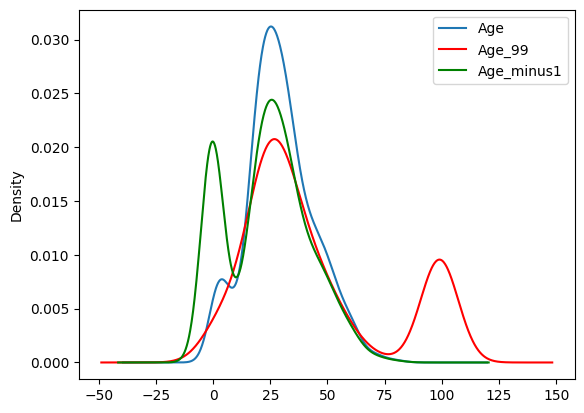

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

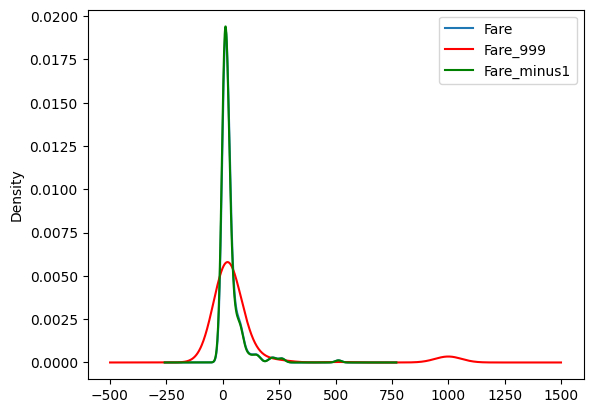

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [78]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
Fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


In [79]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159
Fare_999,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000
